# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | London Heathrow to Gibralta...
1,✅ Trip Verified | First time flying British Ai...
2,Not Verified | I flew London to Cairo and ret...
3,Not Verified | Absolutely the worst experienc...
4,Not Verified | Flew back from Malta after sc...


In [4]:
import os
# Check if 'data' directory exists, if not, create it
if not os.path.exists('data'):
    os.makedirs('data')

In [5]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [6]:
df

,reviews
0,✅ Trip Verified | London Heathrow to Gibralta...
1,✅ Trip Verified | First time flying British Ai...
2,Not Verified | I flew London to Cairo and ret...
3,Not Verified | Absolutely the worst experienc...
4,Not Verified | Flew back from Malta after sc...
...,...
995,✅ Trip Verified | London to Athens. We were f...
996,✅ Trip Verified | London to Johannesburg. So ...
997,✅ Trip Verified | Newark to Bangalore return ...
998,✅ Trip Verified | London to Berlin scheduled ...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,reviews
count,1000
unique,1000
top,✅ Trip Verified | London Heathrow to Gibralta...
freq,1


In [9]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [10]:
df

,reviews
0,London Heathrow to Gibraltar on 24th October...
1,First time flying British Airways and I would...
2,I flew London to Cairo and return in October...
3,Absolutely the worst experience ever. Flew ...
4,Flew back from Malta after scattering our s...
...,...
995,London to Athens. We were fortunate to get e...
996,London to Johannesburg. So impressed by the ...
997,Newark to Bangalore return via London on BA ...
998,London to Berlin scheduled for 21st December...


Data preprocessing steps:

Data Cleaning 

Analysis Data

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

In [11]:
df.shape

(1000, 1)

# Step 1: Data Cleaning 

In [12]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)

In [13]:
df.head()

,reviews,Cleaned Reviews
0,London Heathrow to Gibraltar on 24th October...,London Heathrow to Gibraltar on th October I ...
1,First time flying British Airways and I would...,First time flying British Airways and I would...
2,I flew London to Cairo and return in October...,I flew London to Cairo and return in October ...
3,Absolutely the worst experience ever. Flew ...,Absolutely the worst experience ever Flew int...
4,Flew back from Malta after scattering our s...,Flew back from Malta after scattering our son...


# Step 2: Analysis Data

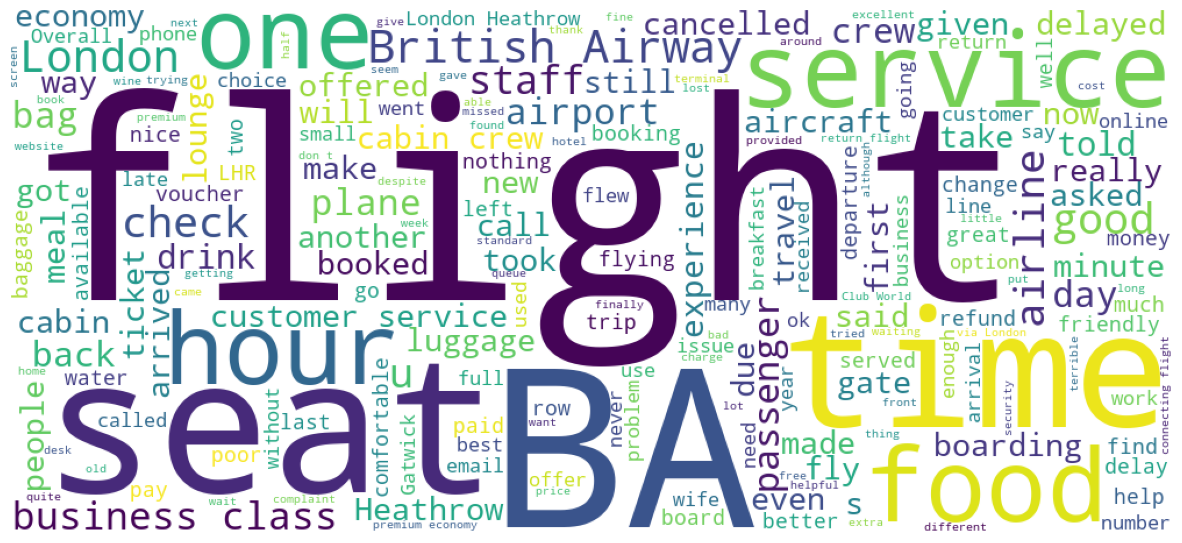

In [14]:
review_word = []

for i in df['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

# Step 3: Tokenization

In [15]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Step 4:POS tagging

In [16]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
   
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 

df['POS tagged Reviews'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

,reviews,Cleaned Reviews,POS tagged Reviews
0,London Heathrow to Gibraltar on 24th October...,London Heathrow to Gibraltar on th October I ...,"[(London, n), (Heathrow, n), (Gibraltar, v), (..."
1,First time flying British Airways and I would...,First time flying British Airways and I would...,"[(First, a), (time, n), (flying, v), (British,..."
2,I flew London to Cairo and return in October...,I flew London to Cairo and return in October ...,"[(flew, v), (London, n), (Cairo, n), (return, ..."
3,Absolutely the worst experience ever. Flew ...,Absolutely the worst experience ever Flew int...,"[(Absolutely, r), (worst, a), (experience, n),..."
4,Flew back from Malta after scattering our s...,Flew back from Malta after scattering our son...,"[(Flew, n), (back, r), (Malta, n), (scattering..."


# Step 5: Obtaining the Stemwords

In [17]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word 
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
        return lemma_rew

df['Lemma_Reviews'] = df['POS tagged Reviews'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged Reviews,Lemma_Reviews
0,London Heathrow to Gibraltar on 24th October...,London Heathrow to Gibraltar on th October I ...,"[(London, n), (Heathrow, n), (Gibraltar, v), (...",London
1,First time flying British Airways and I would...,First time flying British Airways and I would...,"[(First, a), (time, n), (flying, v), (British,...",First
2,I flew London to Cairo and return in October...,I flew London to Cairo and return in October ...,"[(flew, v), (London, n), (Cairo, n), (return, ...",fly
3,Absolutely the worst experience ever. Flew ...,Absolutely the worst experience ever Flew int...,"[(Absolutely, r), (worst, a), (experience, n),...",Absolutely
4,Flew back from Malta after scattering our s...,Flew back from Malta after scattering our son...,"[(Flew, n), (back, r), (Malta, n), (scattering...",Flew


In [18]:
df[['reviews','Lemma_Reviews']]

,reviews,Lemma_Reviews
0,London Heathrow to Gibraltar on 24th October...,London
1,First time flying British Airways and I would...,First
2,I flew London to Cairo and return in October...,fly
3,Absolutely the worst experience ever. Flew ...,Absolutely
4,Flew back from Malta after scattering our s...,Flew
...,...,...
995,London to Athens. We were fortunate to get e...,London
996,London to Johannesburg. So impressed by the ...,London
997,Newark to Bangalore return via London on BA ...,Newark
998,London to Berlin scheduled for 21st December...,London


# Sentiment Analysis using VADER

In [19]:
!pip install vaderSentiment

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate VADER sentiment
def calculate_vader_sentiment(review):
    sentiment_score = analyzer.polarity_scores(review)
    return sentiment_score['compound']

df['Sentiment_score'] = df['Lemma_Reviews'].apply(calculate_vader_sentiment)

# Function to analyze the sentiment
def analyze_sentiment(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_category'] = df['Sentiment_score'].apply(analyze_sentiment)
df.head(10)


,reviews,Cleaned Reviews,POS tagged Reviews,Lemma_Reviews,Sentiment_score,Sentiment_category
0,London Heathrow to Gibraltar on 24th October...,London Heathrow to Gibraltar on th October I ...,"[(London, n), (Heathrow, n), (Gibraltar, v), (...",London,0.0,Neutral
1,First time flying British Airways and I would...,First time flying British Airways and I would...,"[(First, a), (time, n), (flying, v), (British,...",First,0.0,Neutral
2,I flew London to Cairo and return in October...,I flew London to Cairo and return in October ...,"[(flew, v), (London, n), (Cairo, n), (return, ...",fly,0.0,Neutral
3,Absolutely the worst experience ever. Flew ...,Absolutely the worst experience ever Flew int...,"[(Absolutely, r), (worst, a), (experience, n),...",Absolutely,0.0,Neutral
4,Flew back from Malta after scattering our s...,Flew back from Malta after scattering our son...,"[(Flew, n), (back, r), (Malta, n), (scattering...",Flew,0.0,Neutral
5,"Cabin luggage had to go to cargo, even when I...",Cabin luggage had to go to cargo even when I ...,"[(Cabin, n), (luggage, n), (go, v), (cargo, v)...",Cabin,0.0,Neutral
6,I have been using BA for a while now and on ...,I have been using BA for a while now and on a...,"[(using, v), (BA, n), (average, a), (say, v), ...",use,0.0,Neutral
7,I flew from Istanbul to London in Business ...,I flew from Istanbul to London in Business cl...,"[(flew, v), (Istanbul, n), (London, n), (Busin...",fly,0.0,Neutral
8,I have flow on BA several times since the ai...,I have flow on BA several times since the air...,"[(flow, v), (BA, n), (several, a), (times, n),...",flow,0.0,Neutral
9,The flight departed over an hour late due t...,The flight departed over an hour late due to ...,"[(flight, n), (departed, v), (hour, n), (late,...",flight,0.0,Neutral


In [26]:
# Check value_count on Sentiment_category' column
vader_counts = df['Sentiment_category'].value_counts()
vader_counts

Neutral     915
Negative     65
Positive     20
Name: Sentiment_category, dtype: int64

# Visual Representation

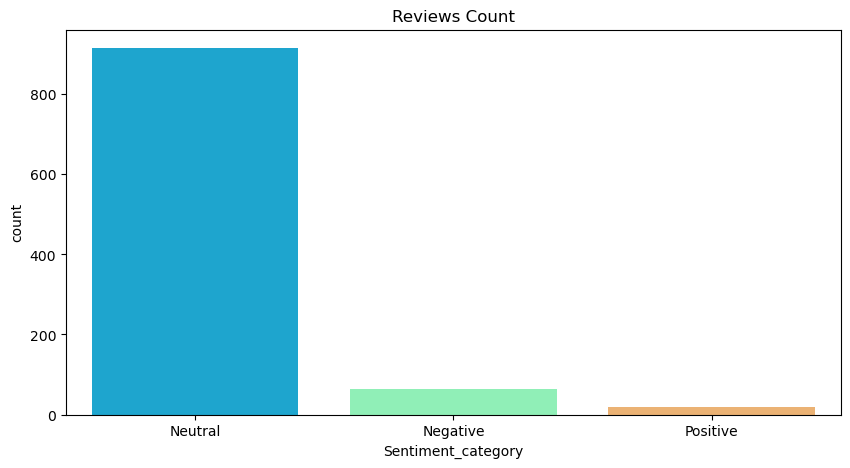

In [37]:
# Sentiment_category Countplot
plt.figure(figsize=(10,5))
plt.title('Reviews Count');
sns.countplot(x=df['Sentiment_category'], data=df, palette='rainbow');

In [29]:
df.to_csv("BA_reviews.csv")

# Wordcloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

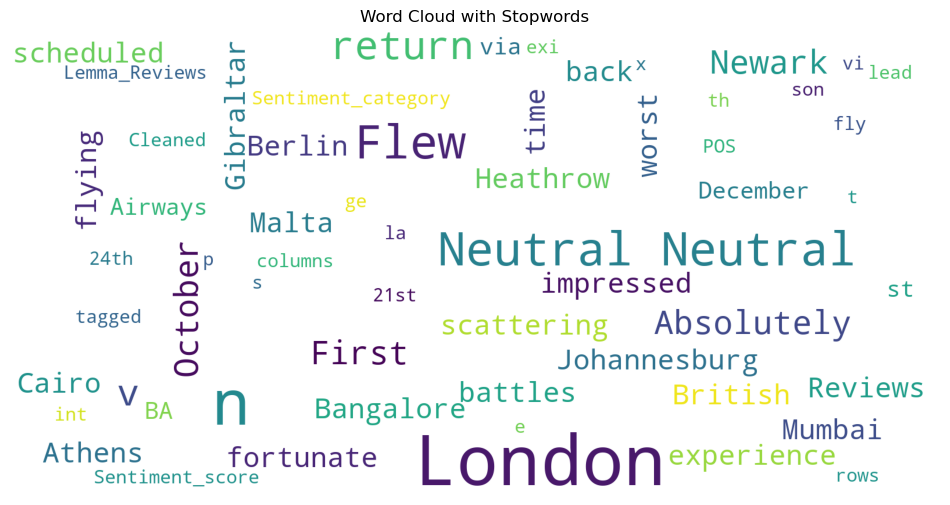

In [36]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=4,
        random_state=1)

    wordcloud=wordcloud.generate(str(df))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.title('Word Cloud with Stopwords')
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma_Reviews)